<a href="https://colab.research.google.com/github/shikhajoshi123/app-data/blob/master/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()
!mkdir -p ~/.kaggle

Saving kaggle.json to kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# changing permission
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ramamet4/app-store-apple-data-set-10k-apps





  0% 0.00/5.63M [00:00<?, ?B/s]
100% 5.63M/5.63M [00:00<00:00, 91.0MB/s]


In [4]:
ls


app-store-apple-data-set-10k-apps.zip  kaggle.json  sample_data/


In [5]:
!unzip app-store-apple-data-set-10k-apps.zip

Archive:  app-store-apple-data-set-10k-apps.zip
  inflating: appleStore_description.csv  
  inflating: AppleStore.csv          


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv("AppleStore.csv")

In [8]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [0]:
df=df.rename({"Unnamed: 0":"unnamed"})

In [10]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [0]:
df=df.drop("Unnamed: 0",axis=1)

In [0]:
free=df[df["price"]==0.00]

In [0]:
paid=df[df["price"]!=0.00]

In [14]:
free.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281796108,Evernote - stay organized,158578688,USD,0.0,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.0,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
6,283646709,PayPal - Send and request money safely,227795968,USD,0.0,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1


In [0]:
df['size_mb']=df['size_bytes']/(1024*1024)

In [16]:
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,96.119141
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,151.232422
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,95.867188
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,122.558594
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,88.476562


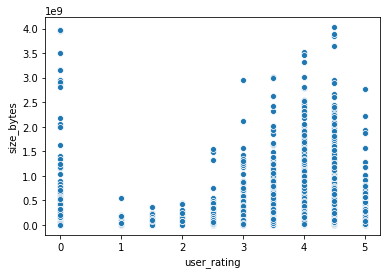

In [17]:
sns.scatterplot(x='user_rating',y='size_bytes',data=df)

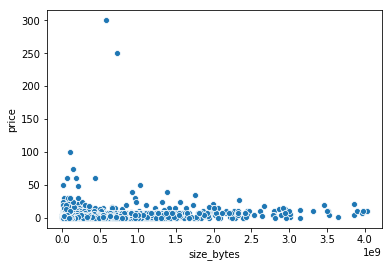

In [40]:
sns.scatterplot(x='size_bytes',y='price',data=df)

In [0]:
genre=df['prime_genre'].value_counts()
genre=genre.to_frame()

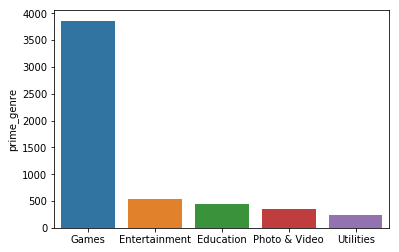

In [19]:
sns.barplot(x=genre.index[:5],y='prime_genre',data=genre.head())

In [0]:
games=df[df['prime_genre']=="Games"]

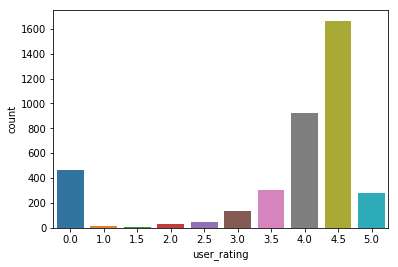

In [21]:
sns.countplot(x='user_rating',data=games)

In [0]:
def genres(x):
  genres=df[df['prime_genre']==x]
  sns.countplot(x='user_rating',data=genres)
  return genres

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb
32,289446241,Election 2016 Map,2386944,USD,0.99,137,0,3.0,0.0,5.0,4+,Entertainment,37,1,1,1,2.276367
36,290807369,Line Rider iRide™,1646592,USD,1.99,21609,69,3.5,2.5,2.4,9+,Entertainment,40,0,1,1,1.570312
46,293760823,iFart - The Original Fart Sounds App,60320768,USD,1.99,21825,10,3.0,4.0,4.0.8,9+,Entertainment,37,5,1,1,57.526367
57,297244048,VLC Remote,31505408,USD,4.99,2027,2,4.0,5.0,9.30,4+,Entertainment,37,5,33,1,30.045898
78,301387274,Pocket God,145293312,USD,0.99,187529,1071,4.0,4.0,1.48.2,9+,Entertainment,43,5,1,1,138.562500
107,307386350,DIRECTV,151397376,USD,0.00,81006,25,3.5,3.0,4.9.705,4+,Entertainment,37,0,1,1,144.383789
111,307764057,niconico,25808896,USD,0.00,182,0,3.0,0.0,6.52,17+,Entertainment,37,5,3,1,24.613281
112,307906541,Fandango Movies - Times + Tickets,81924096,USD,0.00,291787,589,4.0,5.0,8.6,4+,Entertainment,37,4,1,1,78.128906
120,309187846,SFR TV,122153984,USD,0.00,46,0,3.0,0.0,7.3.0,4+,Entertainment,37,5,1,1,116.495117
137,312343159,The Moron Test,45712384,USD,0.00,88613,392,4.0,4.5,6.3.1,4+,Entertainment,37,5,1,1,43.594727


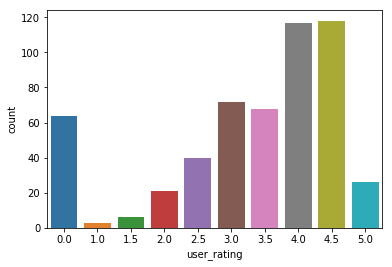

In [23]:
genres('Entertainment')

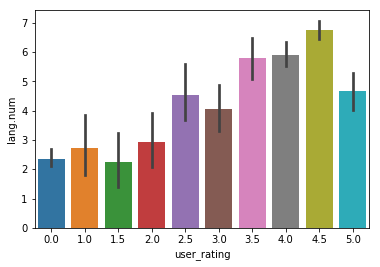

In [24]:
sns.barplot(x='user_rating',y='lang.num',data=df)

In [25]:
df['ver'].value_counts()

1.0           317
1.1           266
1.2           218
1.0.0         187
1.0.1         180
1.3           136
1.0.2         129
1.4           108
1.5            95
1.0.3          95
2.0            94
1.1.1          87
1.1.0          73
1.0.4          72
2.1            67
1.2.1          66
1.6            60
1.0.5          56
1.1.2          55
1.7            54
1.3.1          50
2.2            47
1.2.0          47
1.0.6          46
1.3.0          40
1.2.2          38
3.0            37
2.3            36
1.8            36
3.1            35
             ... 
24.92.0         1
5.6.15          1
6.8.4           1
7.12.17         1
22              1
1.2.92          1
5.1.5           1
2.60            1
9.1.10          1
10.12           1
5.71            1
6.5.0           1
1.05.005        1
6.8.92          1
2.44.2          1
1.3.177598      1
1.21.2          1
17.0.631        1
1.7.177604      1
3.9.90          1
17.3            1
v1.865          1
1.10.14         1
3.0.60          1
17.4      

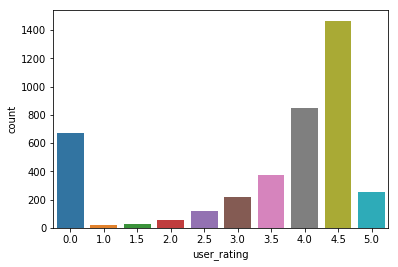

In [26]:
sns.countplot(x='user_rating',data=free)

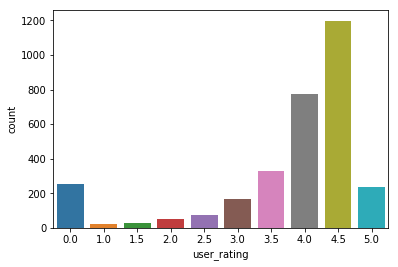

In [27]:
sns.countplot(x='user_rating',data=paid)

In [0]:
q=df['prime_genre'].value_counts()

In [0]:
a=q.head().index

In [30]:
a

Index(['Games', 'Entertainment', 'Education', 'Photo & Video', 'Utilities'], dtype='object')

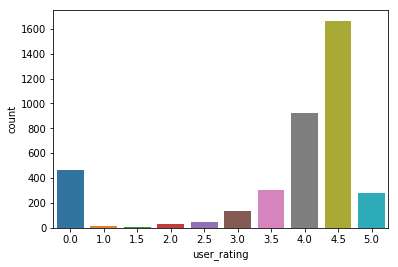

In [31]:
for i in range (len(a)):
  genres(a[i])


In [0]:
df.loc[df.price==0,"prices"]=0
df.loc[df.price>0,"prices"]=1

In [0]:
def genresp(x):
  genres=df[df['prime_genre']==x]
  sns.countplot(x='user_rating',hue='prices',data=genres)
  return genresp

<function __main__.genresp>

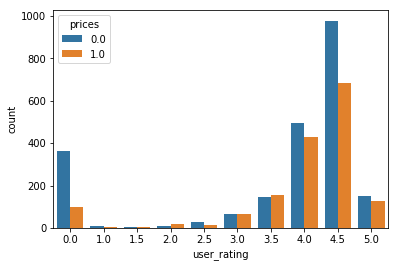

In [35]:
genresp('Games')

<function __main__.genresp>

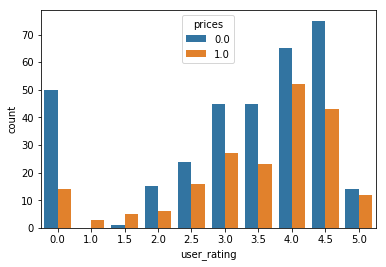

In [36]:
genresp('Entertainment')

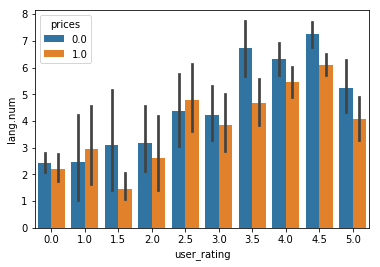

In [37]:
sns.barplot(x='user_rating',y='lang.num',hue='prices',data=df)

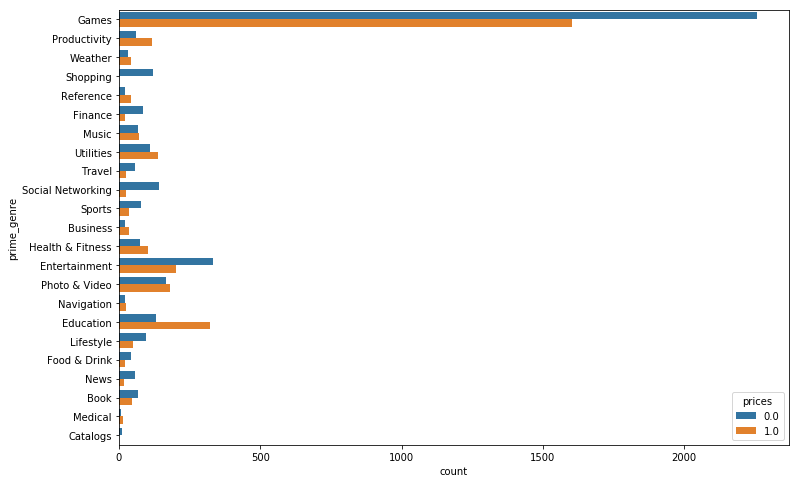

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(y='prime_genre',hue='prices',data=df)